In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import caffe

In [2]:
caffe.set_mode_cpu()

In [19]:
net = caffe.Net('conv.prototxt', caffe.TEST)


In [20]:
print net.inputs
print  [(k, v.data.shape) for k, v in net.blobs.items()]

[]
[('data', (64, 1, 36, 36)), ('labels', (64,)), ('conv1', (64, 5, 32, 32)), ('pool1', (64, 5, 16, 16)), ('conv2', (64, 10, 12, 12)), ('pool2', (64, 10, 6, 6)), ('ip1', (64, 50)), ('ip2', (64, 2)), ('prob', (64, 2))]


In [22]:
net.forward()

{'labels': array([ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
         1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
         1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
         1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.], dtype=float32),
 'prob': array([[ 0.12609813,  0.8739019 ],
        [ 0.12594393,  0.87405604],
        [ 0.12436327,  0.87563676],
        [ 0.1248315 ,  0.8751685 ],
        [ 0.12324983,  0.87675017],
        [ 0.12490419,  0.87509578],
        [ 0.12769526,  0.87230468],
        [ 0.12546992,  0.87453008],
        [ 0.12355893,  0.87644112],
        [ 0.12419153,  0.87580842],
        [ 0.12696791,  0.87303203],
        [ 0.12393607,  0.87606388],
        [ 0.12483864,  0.87516135],
        [ 0.1274021 ,  0.87259787],
        [ 0.12583697,  0.87416297],
        [ 0.12562779,  0.87437218],
        [ 0.12701194,  0.8729

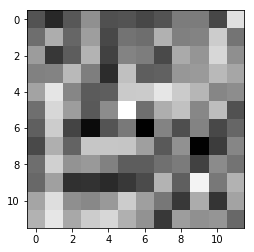

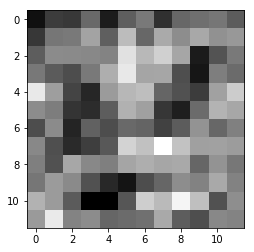

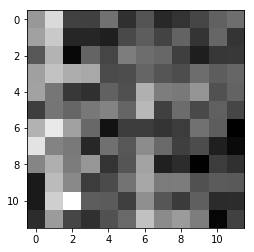

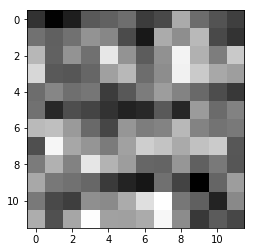

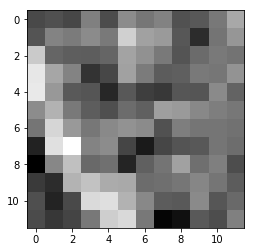

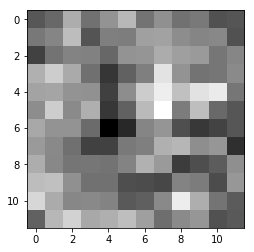

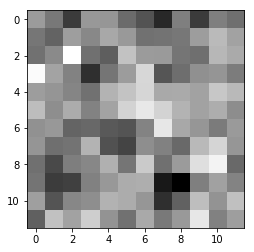

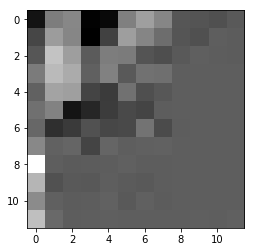

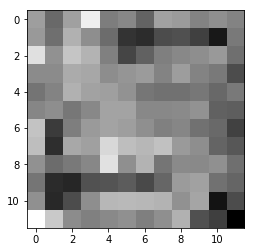

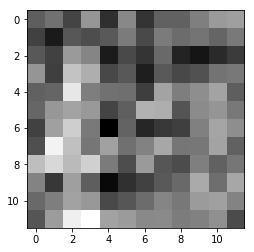

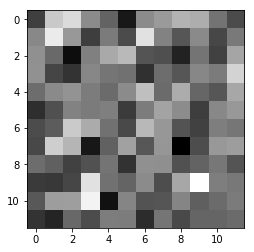

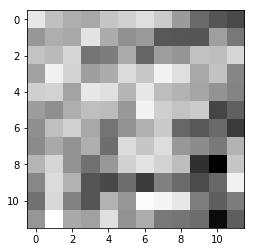

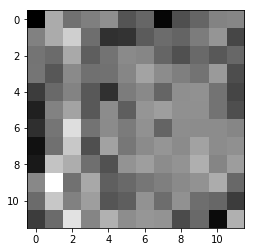

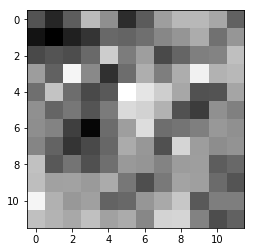

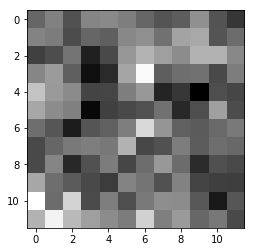

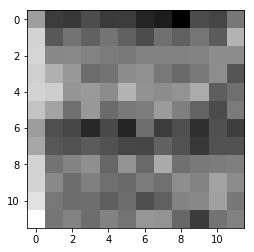

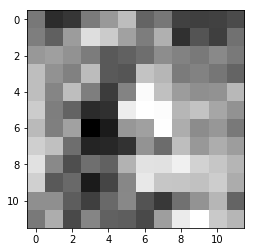

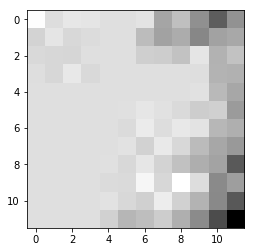

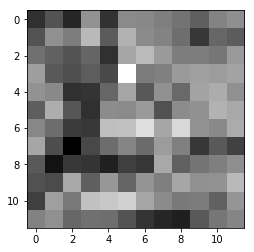

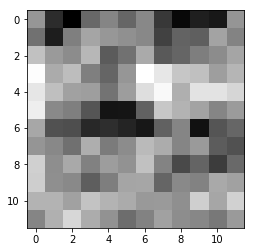

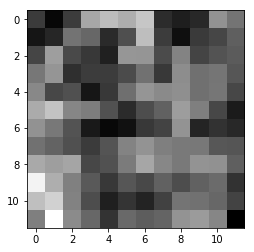

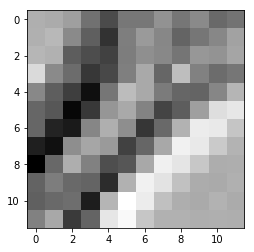

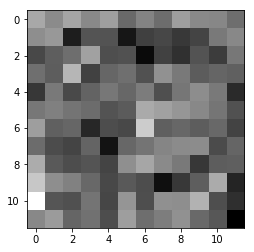

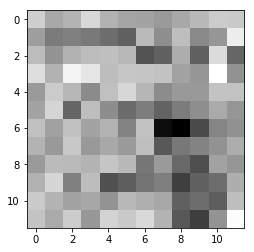

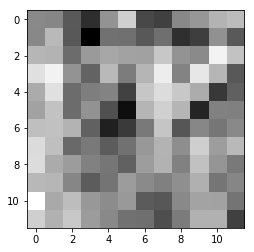

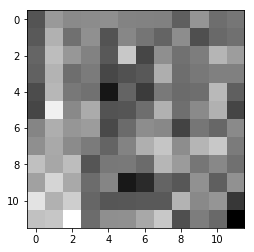

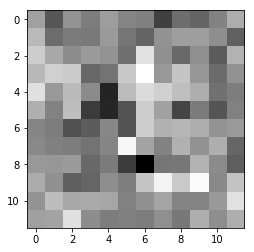

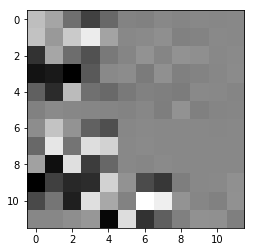

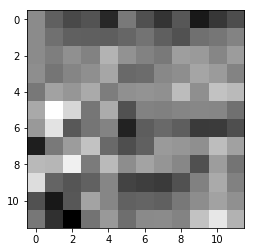

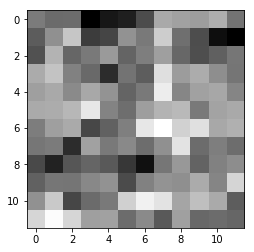

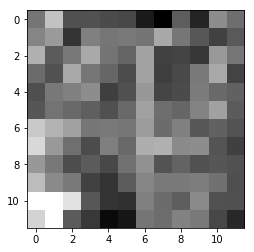

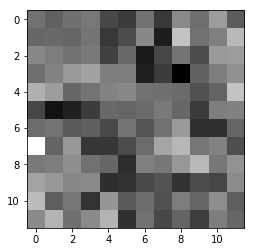

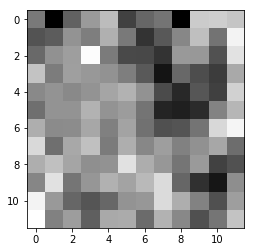

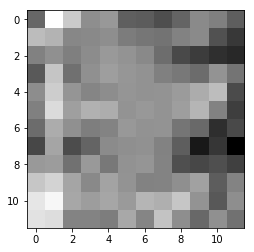

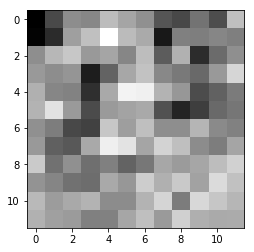

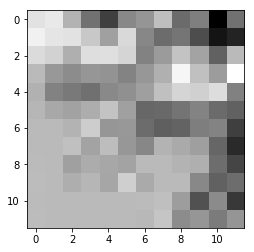

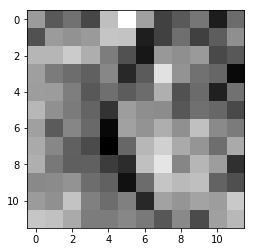

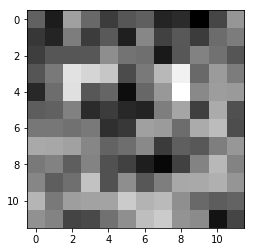

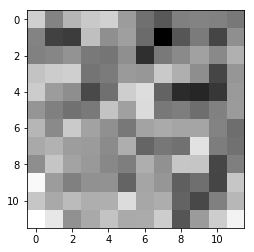

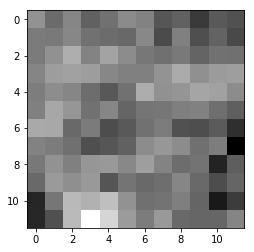

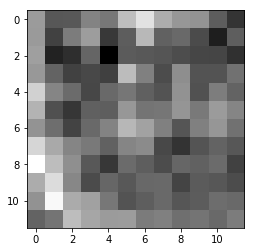

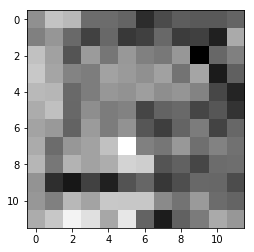

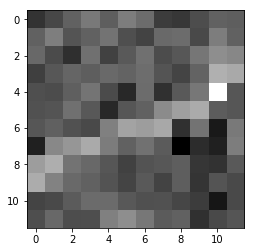

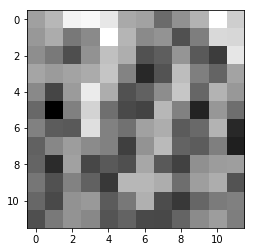

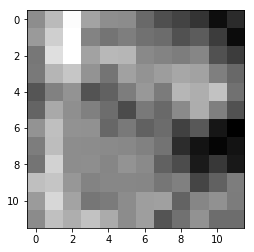

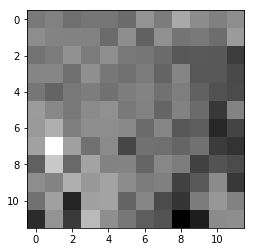

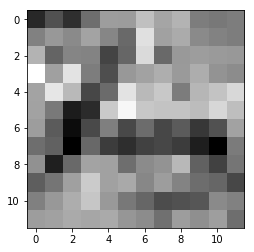

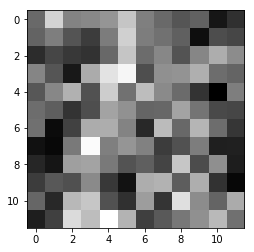

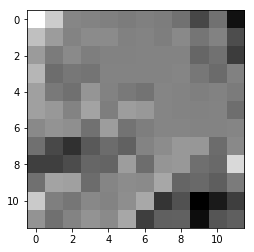

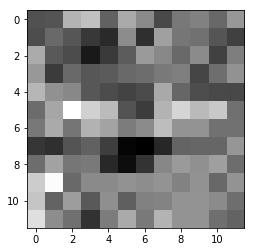

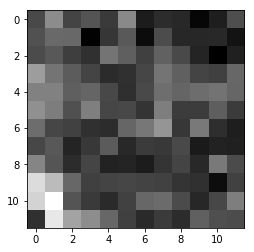

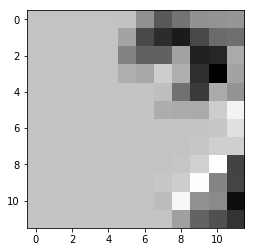

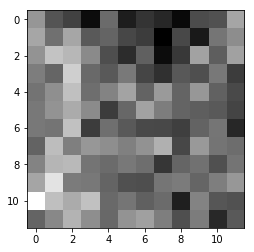

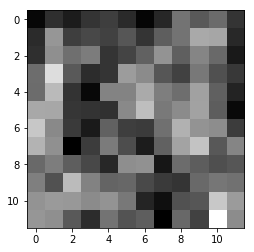

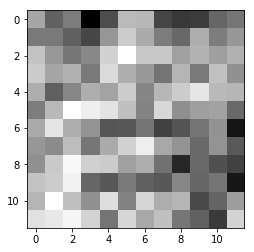

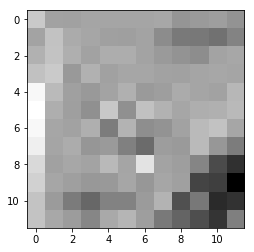

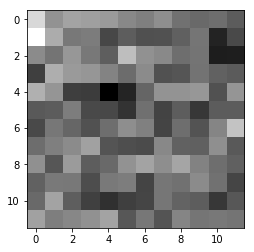

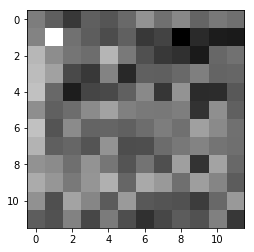

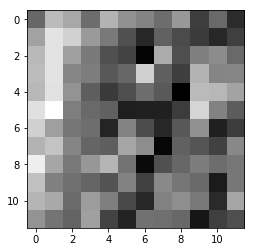

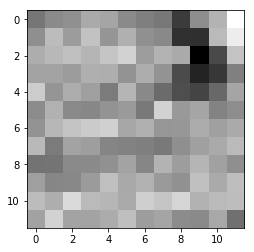

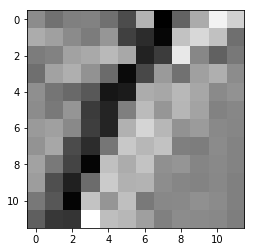

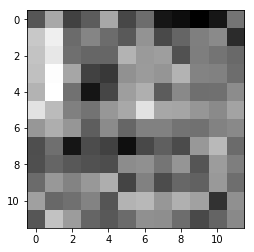

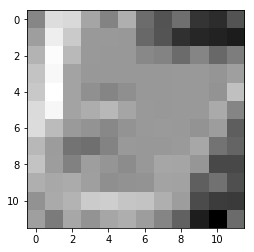

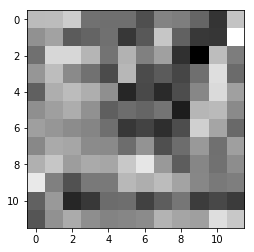

In [25]:
for i in range(64):
    plt.imshow(net.blobs['conv2'].data[i,0], cmap='gray')
    plt.show()

In [3]:
solver = caffe.SGDSolver('solver.prototxt')


In [ ]:
solver.step(10)


In [ ]:
accuracy = 0
batch_size = solver.test_nets[0].blobs['data'].num
test_iters = int(len(Xt) / batch_size)
for i in range(test_iters):
    solver.test_nets[0].forward()
    accuracy += solver.test_nets[0].blobs['accuracy'].data
accuracy /= test_iters

print "Accuracy: {:.3f}".format(accuracy)
